In [1]:
# from flair.models import TextClassifier
# from flair.data import Sentence
# classifier = TextClassifier.load('en-sentiment')
# sentence = Sentence('ache is bad!')
# classifier.predict(sentence)
# # print sentence with predicted labels
# print('Sentence above is: ', sentence.labels)

In [2]:
import pandas as pd
import numpy as np
import itertools
import codecs
import os

In [3]:
# get the current working directory
data_path = '/nfs/gns/literature/Santosh_Tirunagari/EBI standard Dataset/CSV/'
# os.path.abspath(os.path.join(os.path.dirname( '__file__' ), '..', 'Datasets'))+'/'

# Although the dataset says csv, it is tab delimited. In addition to this, they have severe codels problems. 
# So best to parse throught codes first. 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 2: invalid start byte

#open for reading with "universal" type set

import codecs

doc_d_t = codecs.open(data_path+'GD_extracts.csv','rU','UTF-8') 
GDA_temp = pd.read_csv(doc_d_t, sep='\t', na_filter = False, names=['text', 'label'], index_col = False)


In [4]:
df = GDA_temp[['label','text']]
df = df[df['text'].apply(lambda x: len(x)>50)] 
# df.reset_index(inplace=True)
df

,label,text
0,NGD,Sucrose- and H+-Dependent Charge Movements Ass...
1,NGD,Conceived and designed the experiments: AC HK ...
2,NGD,Associations of Amylin with Inflammatory Marke...
3,NGD,Conceived and designed the experiments: YL XL ...
5,NGD,GR3027 antagonizes GABAA receptor-potentiating...
...,...,...
70231,NGD,Identical or similar (difference in the presen...
70232,NGD,"On the other hand, all IgG anti-HIV evaluated ..."
70233,NGD,"Notably, we could not find an association betw..."
70234,NGD,Representative IgG anti-HIV patterns from two ...


In [5]:
labels_count = df['label'].value_counts()
labels_count.plot(kind="bar")
print(df['label'].value_counts())

NGD    41203
YGD      429
Name: label, dtype: int64


In [6]:
# Since the data GD association data is so less. We need to bump the data from the publicly available datasets.

YGD_df = df[df['label']=='YGD']
NGD_df = df[df['label']=='NGD']

In [7]:
data_path_ = '/nfs/gns/literature/Santosh_Tirunagari/GitHub/Unsupervised-Protein-Genes-Diseases-Extraction/Datasets/'

doc_d_t = codecs.open(data_path_+'EUADR_Corpus_IBIgroup/'+'EUADR_drug_target'+'.csv','rU','UTF-8') 
EUADR_drug_target = pd.read_csv(doc_d_t, sep='\t', na_filter = False)
EUADR_drug_target['label'] = 'NGD'
EUADR_NGD_df = EUADR_drug_target[['SENTENCE','label']]

doc_t_d = codecs.open(data_path_+'EUADR_Corpus_IBIgroup/'+'EUADR_target_disease'+'.csv','rU','UTF-8',errors='ignore') 
EUADR_target_disease = pd.read_csv(doc_t_d, sep='\t', na_filter = False)
EUADR_target_disease['label'] = 'YGD'
EUADR_YGD_df = EUADR_target_disease[['SENTENCE','label']]

EUADR_YGD_df.rename(columns={"SENTENCE": "text"}, inplace=True)
EUADR_YGD_df.reset_index(inplace=True)

EUADR_NGD_df.rename(columns={"SENTENCE": "text"}, inplace=True)
EUADR_NGD_df.reset_index(inplace=True)

/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [8]:
doc_t_d = codecs.open(data_path_+'GAD_Corpus_IBIgroup/'+'GAD_Y_N'+'.csv','rU','UTF-8',errors='ignore') 
GAD_target_disease_Y_N = pd.read_csv(doc_t_d, sep='\t', na_filter = False)
GAD_target_disease_Y_N['label'] = 'YGD'

doc_t_d = codecs.open(data_path_+'GAD_Corpus_IBIgroup/'+'GAD_F'+'.csv','rU','UTF-8',errors='ignore') 
GAD_target_disease_F = pd.read_csv(doc_t_d, sep='\t', na_filter = False)
GAD_target_disease_F['label'] = 'YGD'

GAD_YGD_df = GAD_target_disease_Y_N[['GAD_CONCLUSION', 'label']].append(GAD_target_disease_F[['GAD_CONCLUSION', 'label']])


GAD_YGD_df.rename(columns={"GAD_CONCLUSION": "text"}, inplace=True)

GAD_YGD_df.reset_index(inplace=True)

In [9]:
YGD_combined = YGD_df.append(EUADR_YGD_df.append(GAD_YGD_df))
YGD_combined.to_csv(data_path+'YGD.csv', sep = '\t')

/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [10]:
NGD_combined = EUADR_NGD_df.append(NGD_df)
NGD_combined_ = NGD_combined.head(7000)
NGD_combined_.to_csv(data_path+'NGD.csv', sep = '\t')

In [11]:
associations_combined= YGD_combined.append(NGD_combined_)
associations_combined = associations_combined[['label','text']]
associations_combined.head(10)

,label,text
19,YGD,"However, the role of amylin in obesity related..."
22,YGD,"Therefore, we aimed to evaluate the distributi..."
57,YGD,The amylin-MetS association is independent of ...
65,YGD,"Amylin, also named islet amyloid polypeptide (..."
83,YGD,Chronic infusion of amylin into the brain redu...
92,YGD,Elevated levels of amylin were observed in obe...
121,YGD,We also examined whether the amylin-MetS assoc...
1396,YGD,"The severity of MetS, indicated as ≤1, 2, 3 an..."
1404,YGD,These results suggest that amylin is associate...
2185,YGD,No significant interactions were observed betw...


In [12]:
associations_combined.to_csv(data_path+'associations_dataset.csv', sep = '\t')

In [13]:
from sklearn.model_selection import train_test_split

data_loc = '/nfs/gns/literature/Santosh_Tirunagari/EBI standard Dataset/processed_datasets/'

data = associations_combined
data['label'] = '__label__' + data['label'].astype(str)
# data.iloc[0:int(len(data)*0.8)].to_csv(data_loc+'train.csv', sep='\t', index = False, header = False)
# data.iloc[int(len(data)*0.8):int(len(data)*0.9)].to_csv(data_loc+'test.csv', sep='\t', index = False, header = False)
# data.iloc[int(len(data)*0.9):].to_csv(data_loc+'dev.csv', sep='\t', index = False, header = False);

df_train, df_valid = train_test_split(data, test_size=0.1, stratify=data['label'])
df_train, df_test = train_test_split(df_train, test_size=0.1, stratify=df_train['label'])

__label__NGD    5670
__label__YGD    4951
Name: label, dtype: int64


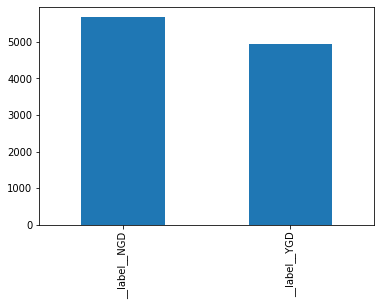

In [14]:
labels_count = df_train['label'].value_counts()
labels_count.plot(kind="bar")
print(df_train['label'].value_counts())

__label__NGD    630
__label__YGD    551
Name: label, dtype: int64


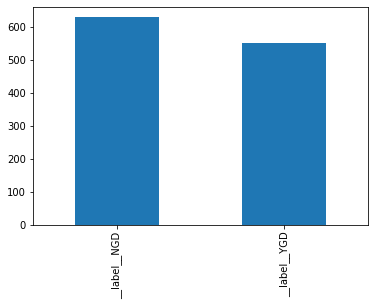

In [15]:
labels_count = df_test['label'].value_counts()
labels_count.plot(kind="bar")
print(df_test['label'].value_counts())

__label__NGD    700
__label__YGD    612
Name: label, dtype: int64


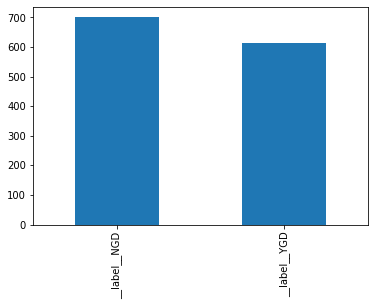

In [16]:
labels_count = df_valid['label'].value_counts()
labels_count.plot(kind="bar")
print(df_valid['label'].value_counts())

In [17]:
from flair.data_fetcher import NLPTaskDataFetcher
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.embeddings import TokenEmbeddings, PooledFlairEmbeddings, StackedEmbeddings, CharacterEmbeddings
# from flair.embeddings import BertEmbeddings
from flair.embeddings import ELMoEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
from typing import List


elmo_embeddings_pubmed = ELMoEmbeddings('pubmed')


In [18]:
corpus = NLPTaskDataFetcher.load_classification_corpus(Path(data_loc), test_file='test.csv', dev_file='dev.csv', train_file='train.csv')


2019-09-30 09:51:36,007 Reading data from /nfs/gns/literature/Santosh_Tirunagari/EBI standard Dataset/processed_datasets
2019-09-30 09:51:36,011 Train: /nfs/gns/literature/Santosh_Tirunagari/EBI standard Dataset/processed_datasets/train.csv
2019-09-30 09:51:36,012 Dev: /nfs/gns/literature/Santosh_Tirunagari/EBI standard Dataset/processed_datasets/dev.csv
2019-09-30 09:51:36,013 Test: /nfs/gns/literature/Santosh_Tirunagari/EBI standard Dataset/processed_datasets/test.csv


/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) load_classification_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  """Entry point for launching an IPython kernel.
/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/flair/data_fetcher.py:447: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/flair/data_fetcher.py:454: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/flair/data_fetcher.py:463: Depre

In [19]:
# 3. make a list of word embeddings
word_embeddings = [WordEmbeddings('glove'),
                   # comment in flair embeddings for state-of-the-art results
                   FlairEmbeddings('news-forward'),
                   FlairEmbeddings('news-backward'),
                   CharacterEmbeddings(), 
                   PooledFlairEmbeddings('pubmed-backward', pooling='max'),
                   PooledFlairEmbeddings('pubmed-forward', pooling='max'),
                   # BertEmbedding('bert-large-cased'),
                   elmo_embeddings_pubmed
                   ]



In [20]:
# document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                   rnn_type = "LSTM",
                                                                     hidden_size=512,
                                                                     reproject_words=True,
                                                                     reproject_words_dimension=256,
                                                                     )

In [21]:
classifier = TextClassifier(document_embeddings, label_dictionary=corpus.make_label_dictionary(), multi_label=False)



2019-09-30 09:52:00,739 Computing label dictionary. Progress:


100%|██████████| 10491/10491 [00:00<00:00, 400707.06it/s]

2019-09-30 09:52:00,772 [b'NGD', b'YGD']


In [22]:
trainer = ModelTrainer(classifier, corpus)


In [23]:
# 7. start the training
# trainer.train(data_loc, max_epochs=10)

result_loc = '../flair_models/text_classification/association_model/v-01'
trainer.train(result_loc,
              learning_rate=0.1,
              mini_batch_size=128,
              anneal_factor=0.5,
              patience=5,
              max_epochs=150)

2019-09-30 09:52:11,445 ----------------------------------------------------------------------------------------------------
2019-09-30 09:52:11,447 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_3): CharacterEmbeddings(
        (char_embedding): Embedding(275, 25)
        (char_rnn): LSTM(25, 25, bidirectional=True)
 

2019-09-30 10:14:10,678 epoch 4 - iter 40/82 - loss 0.07615654 - samples/sec: 39.49
2019-09-30 10:14:38,752 epoch 4 - iter 48/82 - loss 0.07344441 - samples/sec: 37.99
2019-09-30 10:15:06,632 epoch 4 - iter 56/82 - loss 0.07318131 - samples/sec: 38.40
2019-09-30 10:15:34,886 epoch 4 - iter 64/82 - loss 0.07542215 - samples/sec: 37.64
2019-09-30 10:16:02,373 epoch 4 - iter 72/82 - loss 0.07296997 - samples/sec: 39.03
2019-09-30 10:16:32,262 epoch 4 - iter 80/82 - loss 0.06982769 - samples/sec: 35.56
2019-09-30 10:16:41,315 ----------------------------------------------------------------------------------------------------
2019-09-30 10:16:41,325 EPOCH 4 done: loss 0.0697 - lr 0.1000
2019-09-30 10:16:57,473 DEV : loss 0.07411547005176544 - score 0.9756
2019-09-30 10:16:57,884 BAD EPOCHS (no improvement): 0
2019-09-30 10:17:06,733 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embedd

2019-09-30 10:45:12,122 epoch 10 - iter 8/82 - loss 0.04830684 - samples/sec: 37.66
2019-09-30 10:45:42,293 epoch 10 - iter 16/82 - loss 0.04296297 - samples/sec: 36.60
2019-09-30 10:46:13,046 epoch 10 - iter 24/82 - loss 0.03974435 - samples/sec: 37.57
2019-09-30 10:46:45,030 epoch 10 - iter 32/82 - loss 0.03926801 - samples/sec: 35.11
2019-09-30 10:47:14,107 epoch 10 - iter 40/82 - loss 0.04014599 - samples/sec: 38.10
2019-09-30 10:47:44,264 epoch 10 - iter 48/82 - loss 0.03812793 - samples/sec: 38.68
2019-09-30 10:48:13,907 epoch 10 - iter 56/82 - loss 0.03792659 - samples/sec: 37.66
2019-09-30 10:48:42,647 epoch 10 - iter 64/82 - loss 0.03690784 - samples/sec: 38.14
2019-09-30 10:49:12,013 epoch 10 - iter 72/82 - loss 0.03708009 - samples/sec: 38.12
2019-09-30 10:49:44,310 epoch 10 - iter 80/82 - loss 0.03825861 - samples/sec: 33.91
2019-09-30 10:49:55,396 ----------------------------------------------------------------------------------------------------
2019-09-30 10:49:55,408 EP

2019-09-30 11:17:33,034 EPOCH 15 done: loss 0.0188 - lr 0.0500
2019-09-30 11:17:49,115 DEV : loss 0.0890231654047966 - score 0.9794
2019-09-30 11:17:49,539 BAD EPOCHS (no improvement): 1
2019-09-30 11:17:49,593 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddings
2019-09-30 11:17:53,488 epoch 16 - iter 0/82 - loss 0.03664696 - samples/sec: 283.52
2019-09-30 11:18:24,521 epoch 16 - iter 8/82 - loss 0.01792615 - samples/sec: 36.22
2019-09-30 11:18:58,554 epoch 16 - iter 16/82 - loss 0.01278234 - samples/sec: 33.33
2019-09-30 11:19:28,616 epoch 16 - iter 24/82 - loss 0.01183882 - samples/sec: 38.63
2019-09-30 11:19:59,548 epoch 16 - iter 32/82 - loss 0.01418734 - samples/sec: 38.30
2019-09-30 11:20:31,587 epoch 16 - iter 40/82 - loss 0.01363661 - samples/sec: 36.89
2019-09-30 11:21:02,014 epoch 16 - iter 48/82 - loss 0.01558192 - samples/sec: 37.14
2019-09-30 11:21:31,752 epoch 

2019-09-30 11:49:24,483 epoch 21 - iter 56/82 - loss 0.01260973 - samples/sec: 38.75
2019-09-30 11:49:53,893 epoch 21 - iter 64/82 - loss 0.01204992 - samples/sec: 37.20
2019-09-30 11:50:21,837 epoch 21 - iter 72/82 - loss 0.01166605 - samples/sec: 38.89
2019-09-30 11:50:52,818 epoch 21 - iter 80/82 - loss 0.01244145 - samples/sec: 34.71
2019-09-30 11:51:03,739 ----------------------------------------------------------------------------------------------------
2019-09-30 11:51:03,748 EPOCH 21 done: loss 0.0123 - lr 0.0250
2019-09-30 11:51:20,242 DEV : loss 0.10280236601829529 - score 0.9787
2019-09-30 11:51:20,665 BAD EPOCHS (no improvement): 1
2019-09-30 11:51:20,670 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddings
2019-09-30 11:51:26,884 epoch 22 - iter 0/82 - loss 0.02408333 - samples/sec: 175.66
2019-09-30 11:51:57,698 epoch 22 - iter 8/82 - loss 0.00937715 - samples/

2019-09-30 12:21:05,834 epoch 27 - iter 16/82 - loss 0.01150444 - samples/sec: 36.65
2019-09-30 12:21:35,550 epoch 27 - iter 24/82 - loss 0.01000485 - samples/sec: 37.08
2019-09-30 12:22:04,410 epoch 27 - iter 32/82 - loss 0.00990526 - samples/sec: 37.61
2019-09-30 12:22:32,929 epoch 27 - iter 40/82 - loss 0.00951509 - samples/sec: 38.13
2019-09-30 12:23:01,302 epoch 27 - iter 48/82 - loss 0.01067844 - samples/sec: 38.70
2019-09-30 12:23:29,627 epoch 27 - iter 56/82 - loss 0.01032987 - samples/sec: 38.96
2019-09-30 12:23:56,975 epoch 27 - iter 64/82 - loss 0.00994532 - samples/sec: 40.00
2019-09-30 12:24:24,949 epoch 27 - iter 72/82 - loss 0.00980902 - samples/sec: 38.65
2019-09-30 12:24:57,051 epoch 27 - iter 80/82 - loss 0.00986768 - samples/sec: 34.48
2019-09-30 12:25:07,968 ----------------------------------------------------------------------------------------------------
2019-09-30 12:25:07,978 EPOCH 27 done: loss 0.0098 - lr 0.0125
2019-09-30 12:25:24,042 DEV : loss 0.1070047020

Epoch    31: reducing learning rate of group 0 to 6.2500e-03.
2019-09-30 12:53:07,843 BAD EPOCHS (no improvement): 6
2019-09-30 12:53:07,850 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddings
2019-09-30 12:53:11,674 epoch 33 - iter 0/82 - loss 0.03640081 - samples/sec: 289.19
2019-09-30 12:53:43,612 epoch 33 - iter 8/82 - loss 0.01023970 - samples/sec: 36.03
2019-09-30 12:54:14,172 epoch 33 - iter 16/82 - loss 0.00812809 - samples/sec: 36.03
2019-09-30 12:54:43,402 epoch 33 - iter 24/82 - loss 0.00749317 - samples/sec: 37.53
2019-09-30 12:55:11,995 epoch 33 - iter 32/82 - loss 0.00889995 - samples/sec: 37.86
2019-09-30 12:55:41,300 epoch 33 - iter 40/82 - loss 0.00885924 - samples/sec: 37.49
2019-09-30 12:56:10,995 epoch 33 - iter 48/82 - loss 0.00959877 - samples/sec: 37.56
2019-09-30 12:56:39,844 epoch 33 - iter 56/82 - loss 0.00917926 - samples/sec: 39.07
2019-09-30 12:5

2019-09-30 13:26:46,277 epoch 38 - iter 72/82 - loss 0.00689683 - samples/sec: 38.73
2019-09-30 13:27:19,763 epoch 38 - iter 80/82 - loss 0.00722618 - samples/sec: 34.32
2019-09-30 13:27:33,334 ----------------------------------------------------------------------------------------------------
2019-09-30 13:27:33,347 EPOCH 38 done: loss 0.0072 - lr 0.0063
2019-09-30 13:27:49,855 DEV : loss 0.10957321524620056 - score 0.9802
2019-09-30 13:27:50,289 BAD EPOCHS (no improvement): 4
2019-09-30 13:27:50,299 ----------------------------------------------------------------------------------------------------
train mode resetting embeddings
train mode resetting embeddings
2019-09-30 13:27:54,210 epoch 39 - iter 0/82 - loss 0.01639747 - samples/sec: 282.45
2019-09-30 13:28:28,446 epoch 39 - iter 8/82 - loss 0.00792994 - samples/sec: 35.02
2019-09-30 13:29:01,032 epoch 39 - iter 16/82 - loss 0.00685861 - samples/sec: 33.76
2019-09-30 13:29:31,445 epoch 39 - iter 24/82 - loss 0.01087883 - samples/

2019-09-30 13:58:39,050 epoch 44 - iter 32/82 - loss 0.00869951 - samples/sec: 38.19
2019-09-30 13:59:08,271 epoch 44 - iter 40/82 - loss 0.00822192 - samples/sec: 37.17
2019-09-30 13:59:38,554 epoch 44 - iter 48/82 - loss 0.00735564 - samples/sec: 36.44
2019-09-30 14:00:10,564 epoch 44 - iter 56/82 - loss 0.00719078 - samples/sec: 33.40
2019-09-30 14:00:40,424 epoch 44 - iter 64/82 - loss 0.00678987 - samples/sec: 36.86
2019-09-30 14:01:10,521 epoch 44 - iter 72/82 - loss 0.00662855 - samples/sec: 36.62
2019-09-30 14:01:43,019 epoch 44 - iter 80/82 - loss 0.00748926 - samples/sec: 33.32
2019-09-30 14:01:54,518 ----------------------------------------------------------------------------------------------------
2019-09-30 14:01:54,528 EPOCH 44 done: loss 0.0075 - lr 0.0031
2019-09-30 14:02:11,057 DEV : loss 0.11159149557352066 - score 0.9802
2019-09-30 14:02:11,505 BAD EPOCHS (no improvement): 4
2019-09-30 14:02:11,516 --------------------------------------------------------------------

train mode resetting embeddings
train mode resetting embeddings
2019-09-30 14:30:44,094 epoch 50 - iter 0/82 - loss 0.02522424 - samples/sec: 162.57
2019-09-30 14:31:13,959 epoch 50 - iter 8/82 - loss 0.00782652 - samples/sec: 35.59
2019-09-30 14:31:43,972 epoch 50 - iter 16/82 - loss 0.01063655 - samples/sec: 35.51
2019-09-30 14:32:13,359 epoch 50 - iter 24/82 - loss 0.01022792 - samples/sec: 36.23
2019-09-30 14:32:41,955 epoch 50 - iter 32/82 - loss 0.00858405 - samples/sec: 37.35
2019-09-30 14:33:11,430 epoch 50 - iter 40/82 - loss 0.00803564 - samples/sec: 36.02
2019-09-30 14:33:39,713 epoch 50 - iter 48/82 - loss 0.00759496 - samples/sec: 37.55
2019-09-30 14:34:08,382 epoch 50 - iter 56/82 - loss 0.00802834 - samples/sec: 37.20
2019-09-30 14:34:36,636 epoch 50 - iter 64/82 - loss 0.00756870 - samples/sec: 37.60
2019-09-30 14:35:04,346 epoch 50 - iter 72/82 - loss 0.00761049 - samples/sec: 38.40
2019-09-30 14:35:36,213 epoch 50 - iter 80/82 - loss 0.00731594 - samples/sec: 33.16
20

2019-09-30 15:02:18,611 Exiting from training early.
2019-09-30 15:02:18,612 Saving model ...
2019-09-30 15:02:28,092 Done.
2019-09-30 15:02:28,093 ----------------------------------------------------------------------------------------------------
2019-09-30 15:02:28,093 Testing using best model ...
2019-09-30 15:02:28,105 loading file ../flair_models/text_classification/association_model/v-01/best-model.pt
2019-09-30 15:03:23,416 0.9756	0.9756	0.9756
2019-09-30 15:03:23,420 
MICRO_AVG: acc 0.9523 - f1-score 0.9756
MACRO_AVG: acc 0.952 - f1-score 0.9753499999999999
NGD        tp: 703 - fp: 19 - fn: 13 - tn: 576 - precision: 0.9737 - recall: 0.9818 - accuracy: 0.9565 - f1-score: 0.9777
YGD        tp: 576 - fp: 13 - fn: 19 - tn: 703 - precision: 0.9779 - recall: 0.9681 - accuracy: 0.9474 - f1-score: 0.9730
2019-09-30 15:03:23,422 ----------------------------------------------------------------------------------------------------


{'test_score': 0.9756,
 'dev_score_history': [0.9581,
  0.9649,
  0.9748,
  0.9756,
  0.9756,
  0.9794,
  0.9779,
  0.9802,
  0.9802,
  0.9779,
  0.8758,
  0.9741,
  0.9794,
  0.971,
  0.9794,
  0.9764,
  0.9771,
  0.9779,
  0.9794,
  0.9787,
  0.9787,
  0.9802,
  0.9794,
  0.9802,
  0.9802,
  0.9802,
  0.9802,
  0.9794,
  0.9794,
  0.9794,
  0.9794,
  0.9794,
  0.9802,
  0.9809,
  0.9802,
  0.9794,
  0.9794,
  0.9802,
  0.9809,
  0.9802,
  0.9802,
  0.9802,
  0.9809,
  0.9802,
  0.9809,
  0.9809,
  0.9794,
  0.9802,
  0.9802,
  0.9802,
  0.9802,
  0.9802,
  0.9802,
  0.9802],
 'train_loss_history': [0.22982725646437668,
  0.09927385504834535,
  0.0813721438142948,
  0.06966244429349899,
  0.06450736417048951,
  0.056881198761757554,
  0.05147832321434668,
  0.04742385910415068,
  0.04370336184028264,
  0.03795581818103972,
  0.03684565474892535,
  0.03590101402298343,
  0.03373580649154397,
  0.030060093526206002,
  0.01876034836352962,
  0.017764907830008645,
  0.017663209466263652,


In [24]:
import torch
torch.cuda.is_available()

True

In [25]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load(result_loc+'/best-model.pt')


2019-09-30 15:03:32,810 loading file ../flair_models/text_classification/association_model/v-01/best-model.pt


In [26]:
# sentence = Sentence('The FCRL3 polymorphisms associated with rheumatoid arthritis in a Japanese population are not associated per se with rheumatoid arthritis in a Spanish population.')
# sentence = Sentence('We obtained evidence from two Caucasian study populations that the His298-allele of PTGES2 Arg298His confers to reduced risk of type 2 diabetes.')
# sentence = Sentence('The sensitivity and specificity of leptomeningeal enhancement to identify patients with ABRA+CAA-RI were 70.4% and 92.6%, respectively, whereas the positive LR was 9.5.')
sentence = Sentence('Our findings suggest a role for ANP in PDR')
classifier.predict(sentence)
str(sentence.labels[0]).split()[1]

'(0.9688912630081177)'

In [ ]:
from tqdm import tqdm
prediction_dataset = '/nfs/gns/literature/Santosh_Tirunagari/Dataset/test.txt'


In [ ]:
import csv
import re     
# Open the file with read only permit
f = open(prediction_dataset)
line = f.readline()
while line:
    sentence = Sentence(f.readline())
    classifier.predict(sentence)
    with open('/nfs/gns/literature/Santosh_Tirunagari/Dataset/association_scores.tsv', 'a') as out_file:
        tsv_writer = csv.writer(out_file, delimiter='\t')
        if str(sentence.labels[0]).split()[0] == 'YGD':
            tsv_writer.writerow([f.readline(), float(str(sentence.labels[0]).split()[1].replace('(', '').replace(')',''))])
        else:
            tsv_writer.writerow([f.readline(), 1.0-float(str(sentence.labels[0]).split()[1].replace('(', '').replace(')',''))])

    
f.close()

    

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

f1_score(ground_truth, predicted_label, average='micro') 